# Convert Keras to TF-Lite

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
model = keras.models.load_model('VGG16_v3_14_0.837.h5')

In [3]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('VGG16-model.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\RAJIT_~1\AppData\Local\Temp\tmphl4dmc86\assets


# Removing TF dependency

In [14]:
from PIL import Image

with Image.open('./Data/test/yes/Y126.jpg') as img:
    img = img.resize((150, 150), Image.NEAREST)

In [15]:
def preprocess_input(x):
    x /= 255.0
    return x

In [16]:
x = np.array(img, dtype='float32')
X = np.array([x])

X = preprocess_input(X)

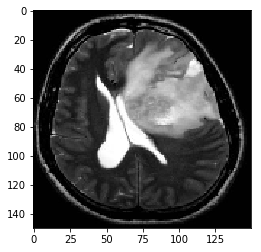

In [26]:
plt.imshow(X[0])

In [17]:
import tensorflow.lite as tflite

In [18]:
interpreter = tflite.Interpreter(model_path='VGG16-model.tflite')
interpreter.allocate_tensors()

In [19]:
input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [20]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [21]:
classes = [
    'yes'
]

dict(zip(classes, preds[0]))

{'yes': 0.8040502}

# Simpler Way

In [1]:
!pip install keras-image-helper

In [2]:
!pip install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime

Looking in indexes: https://pypi.org/simple, https://google-coral.github.io/py-repo/


In [8]:
#import tensorflow.lite as tflite
import tflite_runtime.interpreter as tflite
import numpy as np

In [9]:
interpreter = tflite.Interpreter(model_path='VGG16-model.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [5]:
from PIL import Image

with Image.open('./Data/test/yes/Y126.jpg') as img:
    img = img.resize((150, 150), Image.NEAREST)

In [6]:
def preprocess_input(x):
    x /= 255.0
    return x

In [10]:
x = np.array(img, dtype='float32')
X = np.array([x])

X = preprocess_input(X)

In [11]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [12]:
classes = [
    'yes'
]

dict(zip(classes, preds[0]))

{'yes': 0.80405015}

# Let's select the random brain tumor picture from internet

In [17]:
from io import BytesIO
from urllib import request

def download_image(url, target_size):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    img = img.resize(target_size, Image.NEAREST)
    return img

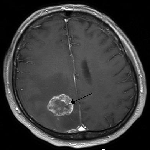

In [21]:
img = download_image("https://upload.wikimedia.org/wikipedia/commons/5/5f/Hirnmetastase_MRT-T1_KM.jpg", (150, 150))
img

In [22]:
url = "https://upload.wikimedia.org/wikipedia/commons/5/5f/Hirnmetastase_MRT-T1_KM.jpg"

img = download_image(url, target_size=(150, 150))

x = np.array(img, dtype='float32')
X = np.array([x])

X = preprocess_input(X)

interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

float_predictions = preds[0].tolist()

dict(zip(classes, float_predictions))

{'yes': 0.6231592893600464}